<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_09_08_2021/notebooks/week_4_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4, task-1:

From Week 3 heatmaps- https://github.com/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_09_08_2021/notebooks/week_3_tasks.ipynb :

Longest sequence of continuously available data for different quarters are-

Quarter-1: 76

Quarter-2: 28

Quarter-3: 49

Quarter-4: 60


In [59]:
import pandas as pd

In [60]:
data = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_09_08_2021/customers_per_hour.csv')

In [61]:
data.drop(columns=['Count1','Count2','Count3','Count4','Count5','Count6','Count21','Count22','Count23','Count24'],inplace=True)

In [62]:
data['Date'] = pd.to_datetime(data['Date'])
data.drop(data[data.Date.dt.isocalendar().year==2010].index,inplace=True)

In [63]:
data

,Date,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20
20,2011-01-04,0,0,0,0,6,5,5,7,6,5,1,0,0,0
21,2011-01-05,0,0,0,3,6,7,12,8,1,5,3,1,0,0
22,2011-01-06,0,0,1,3,4,5,7,3,5,6,5,4,3,0
23,2011-01-07,0,0,0,7,8,4,8,5,7,4,2,1,0,0
24,2011-01-09,0,0,0,0,5,12,9,4,9,7,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,0,3,5,9,9,18,16,16,11,15,6,0,0
301,2011-12-06,0,0,4,6,9,17,25,10,14,8,6,6,0,0
302,2011-12-07,0,0,7,7,8,12,20,12,9,11,5,4,0,0
303,2011-12-08,0,0,1,9,7,12,19,14,7,14,6,5,7,5


In [64]:
data['offset']=pd.DatetimeIndex(data['Date'])+pd.DateOffset(1)
Q1=data.loc[data['offset'].dt.isocalendar().week<=13].copy()
Q2=data.loc[(data['offset'].dt.isocalendar().week>=22) & (data['offset'].dt.isocalendar().week<=26)].copy()
Q3=data.loc[(data['offset'].dt.isocalendar().week>=27) & (data['offset'].dt.isocalendar().week<=35)].copy()
Q4=data.loc[data['offset'].dt.isocalendar().week>=40].copy()

In [65]:
data.drop(columns=['offset'],inplace=True)
Q1.drop(columns=['offset'],inplace=True)
Q2.drop(columns=['offset'],inplace=True)
Q3.drop(columns=['offset'],inplace=True)
Q4.drop(columns=['offset'],inplace=True)

In [66]:
Q2.head()

,Date,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20
139,2011-05-29,0,0,0,0,2,4,5,2,6,3,0,0,0,0
140,2011-05-31,0,0,3,4,6,5,4,9,10,7,0,0,0,0
141,2011-06-01,0,1,1,3,2,3,10,4,3,5,3,1,0,0
142,2011-06-02,0,0,0,3,2,3,6,2,5,3,2,5,1,2
143,2011-06-03,0,1,1,3,7,4,5,3,6,4,2,1,0,0


In [67]:
Q2.drop(index=139,inplace=True)

In [68]:
Q3.tail(10)

,Date,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20
211,2011-08-22,0,0,0,7,10,8,11,8,8,8,0,0,0,0
212,2011-08-23,0,0,2,5,5,9,9,9,6,4,4,4,0,0
213,2011-08-24,0,0,3,5,10,2,10,11,11,5,4,0,0,0
214,2011-08-25,0,0,1,6,11,7,11,7,8,12,0,2,1,3
215,2011-08-26,0,0,1,4,3,10,6,5,10,3,0,0,0,0
216,2011-08-28,0,0,0,0,5,5,10,5,5,5,1,0,0,0
217,2011-08-30,0,0,1,1,3,4,6,1,1,3,2,1,0,0
218,2011-08-31,0,0,1,4,9,5,4,5,4,5,2,2,0,0
219,2011-09-01,0,0,1,4,6,9,8,5,7,5,12,7,4,3
220,2011-09-02,0,0,1,6,11,6,6,11,5,9,3,1,0,0


In [69]:
Q3.drop(index=[217,218,219,220],inplace=True)

In [70]:
Q1.set_index('Date',drop=True,inplace=True)
Q2.set_index('Date',drop=True,inplace=True)
Q3.set_index('Date',drop=True,inplace=True)
Q4.set_index('Date',drop=True,inplace=True)

In [71]:
Q1.columns=[str(i)+':00:00' for i in range(6,20)]
Q2.columns=[str(i)+':00:00' for i in range(6,20)]
Q3.columns=[str(i)+':00:00' for i in range(6,20)]
Q4.columns=[str(i)+':00:00' for i in range(6,20)]

In [72]:
Q1_ts=pd.DataFrame(Q1.stack()).reset_index()
Q2_ts=pd.DataFrame(Q2.stack()).reset_index()
Q3_ts=pd.DataFrame(Q3.stack()).reset_index()
Q4_ts=pd.DataFrame(Q4.stack()).reset_index()

In [73]:
Q1_ts

,Date,level_1,0
0,2011-01-04,6:00:00,0
1,2011-01-04,7:00:00,0
2,2011-01-04,8:00:00,0
3,2011-01-04,9:00:00,0
4,2011-01-04,10:00:00,6
...,...,...,...
1059,2011-04-01,15:00:00,3
1060,2011-04-01,16:00:00,3
1061,2011-04-01,17:00:00,0
1062,2011-04-01,18:00:00,0


In [74]:
Q1_ts.dtypes

Date       datetime64[ns]
level_1            object
0                   int64
dtype: object

In [75]:
Q1_ts['dt_index']=Q1_ts['Date']+pd.to_timedelta(Q1_ts['level_1'])
Q2_ts['dt_index']=Q2_ts['Date']+pd.to_timedelta(Q2_ts['level_1'])
Q3_ts['dt_index']=Q3_ts['Date']+pd.to_timedelta(Q3_ts['level_1'])
Q4_ts['dt_index']=Q4_ts['Date']+pd.to_timedelta(Q4_ts['level_1'])

In [76]:
Q1_ts.drop(columns=['Date','level_1'],inplace=True)
Q2_ts.drop(columns=['Date','level_1'],inplace=True)
Q3_ts.drop(columns=['Date','level_1'],inplace=True)
Q4_ts.drop(columns=['Date','level_1'],inplace=True)

In [77]:
Q1_ts['dt_index']=pd.DatetimeIndex(Q1_ts['dt_index'])
Q2_ts['dt_index']=pd.DatetimeIndex(Q2_ts['dt_index'])
Q3_ts['dt_index']=pd.DatetimeIndex(Q3_ts['dt_index'])
Q4_ts['dt_index']=pd.DatetimeIndex(Q4_ts['dt_index'])

In [78]:
Q1_ts.set_index('dt_index',inplace=True)
Q2_ts.set_index('dt_index',inplace=True)
Q3_ts.set_index('dt_index',inplace=True)
Q4_ts.set_index('dt_index',inplace=True)

In [79]:
Q1_ts.columns=['customer_arr']
Q2_ts.columns=['customer_arr']
Q3_ts.columns=['customer_arr']
Q4_ts.columns=['customer_arr']

In [81]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

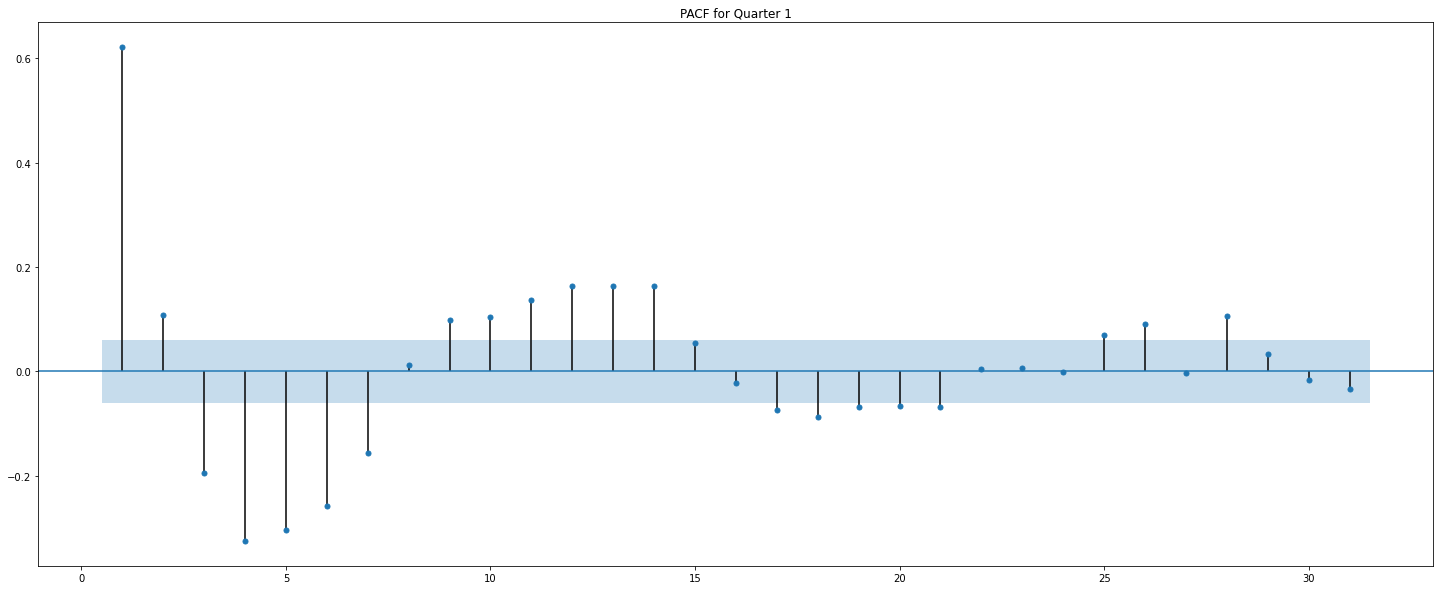

In [83]:
plt.rc("figure", figsize=(25,10))
plot_pacf(Q1_ts,title='PACF for Quarter 1',zero=False);

In [100]:
# Significant lags for Q1
sig_lag_Q1=[1,2,3,4,5,6,7,9,10,11,12,13,14,17,18,19,20,21,25,26,28]

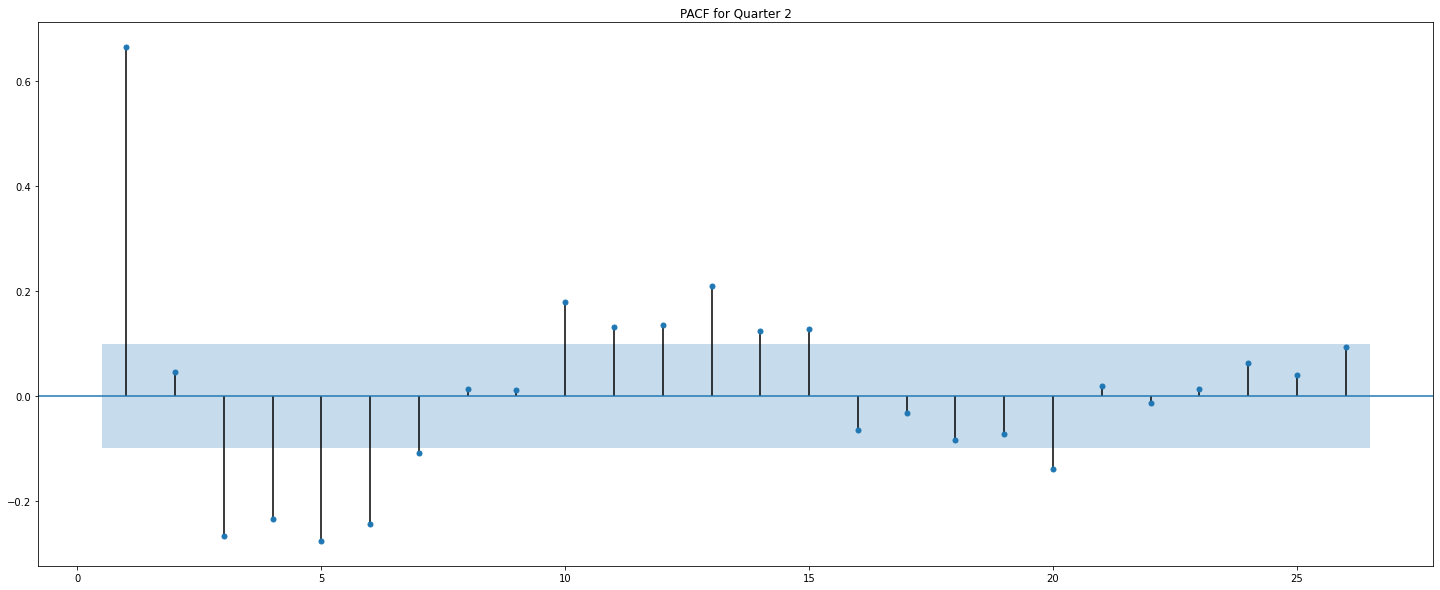

In [90]:
plot_pacf(Q2_ts,title='PACF for Quarter 2',zero=False);

In [101]:
sig_lag_Q2=[1,3,4,5,6,7,10,11,12,13,14,15,20]

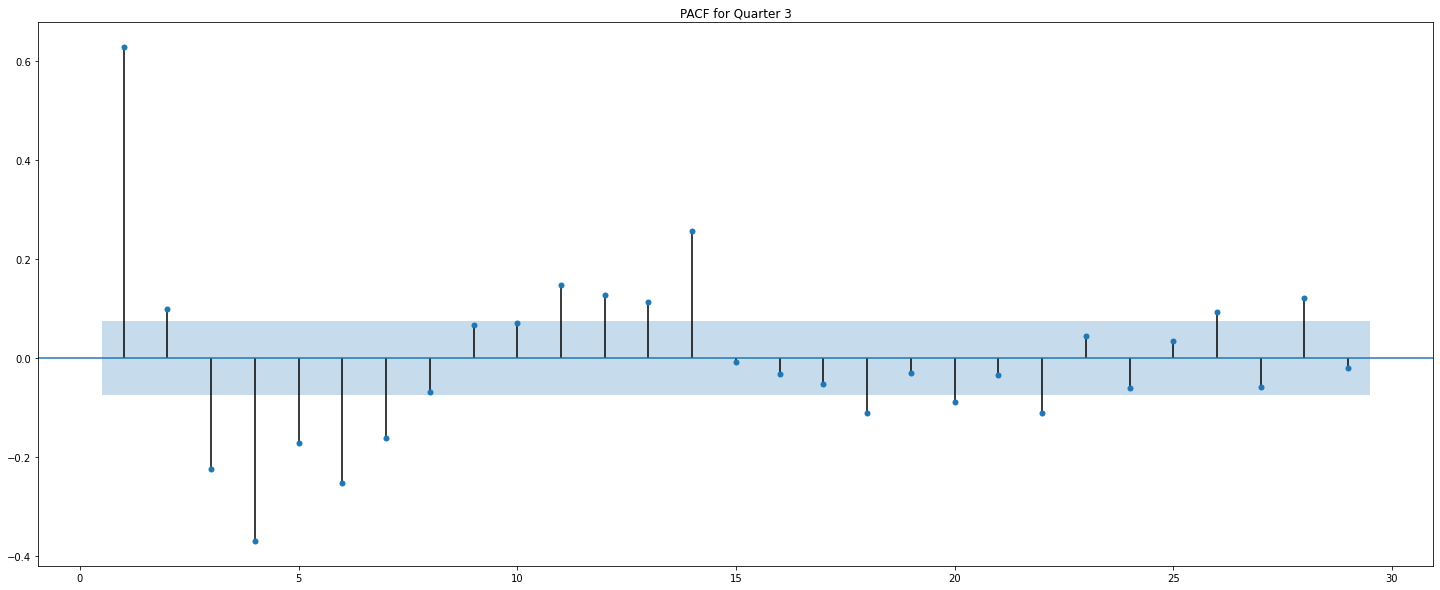

In [94]:
plot_pacf(Q3_ts,title='PACF for Quarter 3',zero=False);

In [102]:
sig_lag_Q3=[1,2,3,4,5,6,7,11,12,13,14,18,20,22,26,28]

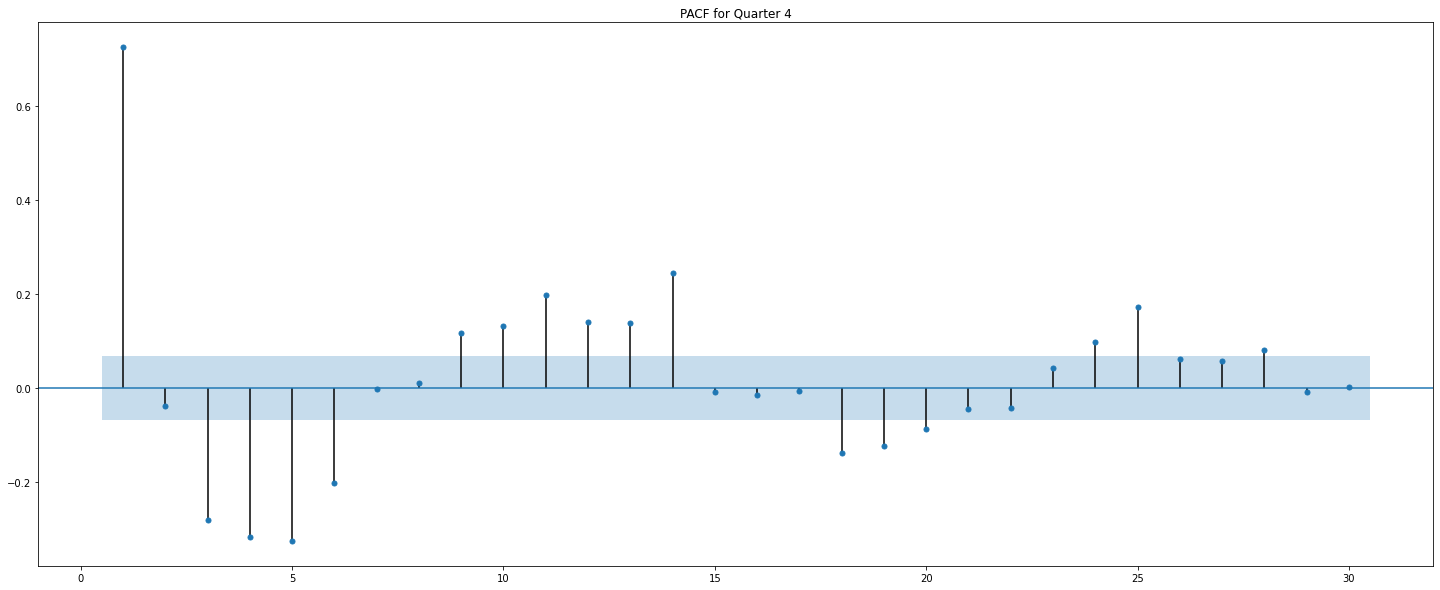

In [103]:
plot_pacf(Q4_ts,title='PACF for Quarter 4',zero=False);

In [104]:
sig_lag_Q4=[1,3,4,5,6,9,10,11,12,13,14,18,19,20,24,25,28]

# Task 2: Finding the significant lags and creating the dataframe

**Intution:** For larger lags around multiple of 14, there may have some correlation. This is because the customer arrivals depends on the hour of the day. For example, the arrival between 12-1 pm is similar to 12-1 pm on other days. Also, this correlation may not be high because of the hours having very less arrival like 6-10 am or 6-8 pm. We are considering lag 14, so, we can ignore those higher lags. 

In [105]:
from numpy import nan

In [106]:
def create_df(Q,sig_lag):
  Q_temp=Q.reset_index()
  Q_temp['h']=Q_temp['dt_index'].dt.time
  col=['arr(h-'+str(i)+')' for i in sig_lag]
  Q_temp[col]=nan
  Q_temp['w']=Q_temp['dt_index'].dt.isocalendar().week
  Q_temp['d']=Q_temp['dt_index'].dt.day_name()
  Q_temp['arr(h)']=Q_temp['customer_arr']
  for i in Q_temp.index:
    for j in sig_lag:
      try:
        Q_temp.loc[i,'arr(h-'+str(j)+')']=Q_temp.loc[i-j,'customer_arr']
      except:
        continue
  return Q_temp.drop(columns=['dt_index','customer_arr'])

In [107]:
Q1_df=create_df(Q1_ts,sig_lag_Q1)
#Q1_df

In [108]:
Q1_df.dropna(inplace=True)
Q1_df

,h,arr(h-1),arr(h-2),arr(h-3),arr(h-4),arr(h-5),arr(h-6),arr(h-7),arr(h-9),arr(h-10),arr(h-11),arr(h-12),arr(h-13),arr(h-14),arr(h-17),arr(h-18),arr(h-19),arr(h-20),arr(h-21),arr(h-25),arr(h-26),arr(h-28),w,d,arr(h)
28,06:00:00,0.0,0.0,1.0,3.0,5.0,1.0,8.0,7.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0,0.0,0.0,0.0,1,Thursday,0
29,07:00:00,0.0,0.0,0.0,1.0,3.0,5.0,1.0,12.0,7.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,6.0,0.0,0.0,1,Thursday,0
30,08:00:00,0.0,0.0,0.0,0.0,1.0,3.0,5.0,8.0,12.0,7.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,6.0,0.0,1,Thursday,1
31,09:00:00,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,8.0,12.0,7.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,0.0,1,Thursday,3
32,10:00:00,3.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,8.0,12.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,6.0,1,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,15:00:00,8.0,11.0,8.0,11.0,9.0,5.0,2.0,0.0,5.0,2.0,5.0,3.0,4.0,6.0,9.0,5.0,5.0,0.0,0.0,1.0,7.0,13,Friday,3
1060,16:00:00,3.0,8.0,11.0,8.0,11.0,9.0,5.0,0.0,0.0,5.0,2.0,5.0,3.0,12.0,6.0,9.0,5.0,5.0,0.0,0.0,4.0,13,Friday,3
1061,17:00:00,3.0,3.0,8.0,11.0,8.0,11.0,9.0,2.0,0.0,0.0,5.0,2.0,5.0,2.0,12.0,6.0,9.0,5.0,0.0,0.0,1.0,13,Friday,0
1062,18:00:00,0.0,3.0,3.0,8.0,11.0,8.0,11.0,5.0,2.0,0.0,0.0,5.0,2.0,4.0,2.0,12.0,6.0,9.0,0.0,0.0,0.0,13,Friday,0


In [109]:
Q1_df.to_csv('Q1_lags_df.csv',index=False)

# Quarter 2:

In [110]:
Q2_df=create_df(Q2_ts,sig_lag_Q2)
#Q2_df

In [111]:
Q2_df.dropna(inplace=True)
Q2_df

,h,arr(h-1),arr(h-3),arr(h-4),arr(h-5),arr(h-6),arr(h-7),arr(h-10),arr(h-11),arr(h-12),arr(h-13),arr(h-14),arr(h-15),arr(h-20),w,d,arr(h)
20,12:00:00,3.0,3.0,1.0,1.0,0.0,0.0,0.0,7.0,10.0,9.0,4.0,5.0,0.0,22,Wednesday,10
21,13:00:00,10.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,7.0,10.0,9.0,4.0,0.0,22,Wednesday,4
22,14:00:00,4.0,3.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,7.0,10.0,9.0,3.0,22,Wednesday,3
23,15:00:00,3.0,10.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,10.0,4.0,22,Wednesday,5
24,16:00:00,5.0,4.0,10.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,22,Wednesday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,15:00:00,3.0,8.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,6.0,4.0,5.0,3.0,26,Friday,4
388,16:00:00,4.0,7.0,8.0,3.0,4.0,3.0,0.0,4.0,3.0,5.0,6.0,4.0,4.0,26,Friday,0
389,17:00:00,0.0,3.0,7.0,8.0,3.0,4.0,0.0,0.0,4.0,3.0,5.0,6.0,5.0,26,Friday,1
390,18:00:00,1.0,4.0,3.0,7.0,8.0,3.0,3.0,0.0,0.0,4.0,3.0,5.0,8.0,26,Friday,0


In [112]:
Q2_df.to_csv('Q2_lags_df.csv',index=False)

# Quarter 3:

In [113]:
Q3_df=create_df(Q3_ts,sig_lag_Q3)
#Q3_df

In [114]:
Q3_df.dropna(inplace=True)
Q3_df

,h,arr(h-1),arr(h-2),arr(h-3),arr(h-4),arr(h-5),arr(h-6),arr(h-7),arr(h-11),arr(h-12),arr(h-13),arr(h-14),arr(h-18),arr(h-20),arr(h-22),arr(h-26),arr(h-28),w,d,arr(h)
28,06:00:00,0.0,0.0,0.0,3.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,0.0,27,Tuesday,0
29,07:00:00,0.0,0.0,0.0,0.0,3.0,7.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,27,Tuesday,0
30,08:00:00,0.0,0.0,0.0,0.0,0.0,3.0,7.0,4.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,27,Tuesday,0
31,09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,4.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,27,Tuesday,9
32,10:00:00,9.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,4.0,3.0,0.0,0.0,2.0,7.0,4.0,27,Tuesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,15:00:00,5.0,5.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,4.0,0.0,2.0,12.0,34,Sunday,5
682,16:00:00,5.0,5.0,5.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,1.0,1.0,0.0,34,Sunday,1
683,17:00:00,1.0,5.0,5.0,5.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,10.0,4.0,3.0,2.0,34,Sunday,0
684,18:00:00,0.0,1.0,5.0,5.0,5.0,10.0,5.0,0.0,0.0,0.0,0.0,10.0,6.0,3.0,0.0,1.0,34,Sunday,0


In [115]:
Q3_df.to_csv('Q3_lags_df.csv',index=False)

# Quarter 4:

In [116]:
Q4_df=create_df(Q4_ts,sig_lag_Q4)
#Q4_df

In [117]:
Q4_df.dropna(inplace=True)
Q4_df

,h,arr(h-1),arr(h-3),arr(h-4),arr(h-5),arr(h-6),arr(h-9),arr(h-10),arr(h-11),arr(h-12),arr(h-13),arr(h-14),arr(h-18),arr(h-19),arr(h-20),arr(h-24),arr(h-25),arr(h-28),w,d,arr(h)
28,06:00:00,0.0,1.0,4.0,7.0,9.0,5.0,6.0,5.0,1.0,0.0,0.0,0.0,6.0,5.0,4.0,0.0,0.0,40,Tuesday,0
29,07:00:00,0.0,0.0,1.0,4.0,7.0,6.0,5.0,6.0,5.0,1.0,0.0,0.0,0.0,6.0,4.0,4.0,0.0,40,Tuesday,0
30,08:00:00,0.0,0.0,0.0,1.0,4.0,6.0,6.0,5.0,6.0,5.0,1.0,0.0,0.0,0.0,8.0,4.0,0.0,40,Tuesday,3
31,09:00:00,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0,5.0,6.0,5.0,0.0,0.0,0.0,5.0,8.0,0.0,40,Tuesday,9
32,10:00:00,9.0,0.0,0.0,0.0,0.0,7.0,9.0,6.0,6.0,5.0,6.0,0.0,0.0,0.0,5.0,5.0,4.0,40,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,15:00:00,0.0,10.0,6.0,8.0,9.0,0.0,5.0,7.0,5.0,6.0,14.0,12.0,7.0,9.0,0.0,0.0,11.0,49,Friday,0
836,16:00:00,0.0,0.0,10.0,6.0,8.0,0.0,0.0,5.0,7.0,5.0,6.0,19.0,12.0,7.0,0.0,0.0,5.0,49,Friday,0
837,17:00:00,0.0,0.0,0.0,10.0,6.0,4.0,0.0,0.0,5.0,7.0,5.0,14.0,19.0,12.0,0.0,0.0,4.0,49,Friday,0
838,18:00:00,0.0,0.0,0.0,0.0,10.0,9.0,4.0,0.0,0.0,5.0,7.0,7.0,14.0,19.0,1.0,0.0,0.0,49,Friday,0


In [118]:
Q4_df.to_csv('Q4_lags_df.csv',index=False)